<h1>Movie Ratings and Revenue Analysis</h1>

<h3>Load Data and Filter</h3>

In [2]:
import pandas as pd

In [4]:
# Basics (title, year, genre, runtime)
basics = pd.read_csv("D:/Movie Ratings and Revenue Analysis Project/title.basics.tsv.gz", sep='\t', compression='gzip', na_values='\\N')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15908\3463156900.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv("D:/Movie Ratings and Revenue Analysis Project/title.basics.tsv.gz", sep='\t', compression='gzip', na_values='\\N')


In [6]:
# Ratings (IMDb rating & vote count)
ratings = pd.read_csv("D:/Movie Ratings and Revenue Analysis Project/title.ratings.tsv.gz", sep='\t', compression='gzip', na_values='\\N')

In [8]:
# Step 2: Convert to CSV (store locally for future use)
basics.to_csv("title_basics.csv", index=False)
ratings.to_csv("title_ratings.csv", index=False)

In [10]:
import os
print(os.getcwd())


C:\Users\Admin


In [14]:
#Load Converted CSVs
basics = pd.read_csv("title_basics.csv", low_memory = False)
ratings = pd.read_csv("title_ratings.csv", low_memory = False)

In [20]:
#Filter only 'movie' titleType and drop NaNs
movies = basics[basics['titleType']=='movie'].dropna(subset=['startYear', 'primaryTitle', 'runtimeMinutes', 'genres'])

#Merge with ratings
merged = pd.merge(movies, ratings, on = 'tconst')

In [24]:
#Convert Datatypes
merged['startYear'] = pd.to_numeric(merged['startYear'], errors = 'coerce')
merged['runtimeMinutes'] = pd.to_numeric(merged['runtimeMinutes'], errors = 'coerce')
merged = merged.dropna(subset=['startYear', 'runtimeMinutes'])

<h3>Genre-wise Rating Analysis</h3>

In [29]:
#Explode Genres
genre_split = merged.copy()
genre_split['genres'] =  genre_split['genres'].str.split(',')
genre_split = genre_split.explode('genres')

# Group by genre
genre_rating = genre_split.groupby('genres')['averageRating'].mean().sort_values(ascending=False)

<h3>Year-wise Rating Trend</h3>

In [32]:
yearly_rating = merged.groupby('startYear')['averageRating'].mean().reset_index()

<h3>Top Rated Movies(min 10k votes)</h3>

In [35]:
top_movies = merged[merged['numVotes'] > 10000]
top_rated = top_movies.sort_values(by='averageRating', ascending=False).head(10)

In [39]:
# Display as a table
top_rated_table = top_rated[['primaryTitle', 'averageRating', 'numVotes']]
top_rated_table

,primaryTitle,averageRating,numVotes
60663,The Shawshank Redemption,9.3,3031615
94437,The Chaos Class,9.2,44331
36825,The Godfather,9.2,2116141
232507,Attack on Titan the Movie: The Last Attack,9.2,15149
95941,Ramayana: The Legend of Prince Rama,9.1,16377
38708,The Godfather Part II,9.0,1424155
59161,Schindler's List,9.0,1516877
180896,The Silence of Swastika,9.0,10615
76255,The Lord of the Rings: The Return of the King,9.0,2070242
24015,12 Angry Men,9.0,920832


<h3>Visualize Using Seaborn/Matplotlib</h3>

<h5>Genre-wise Rating Barplot</h5>

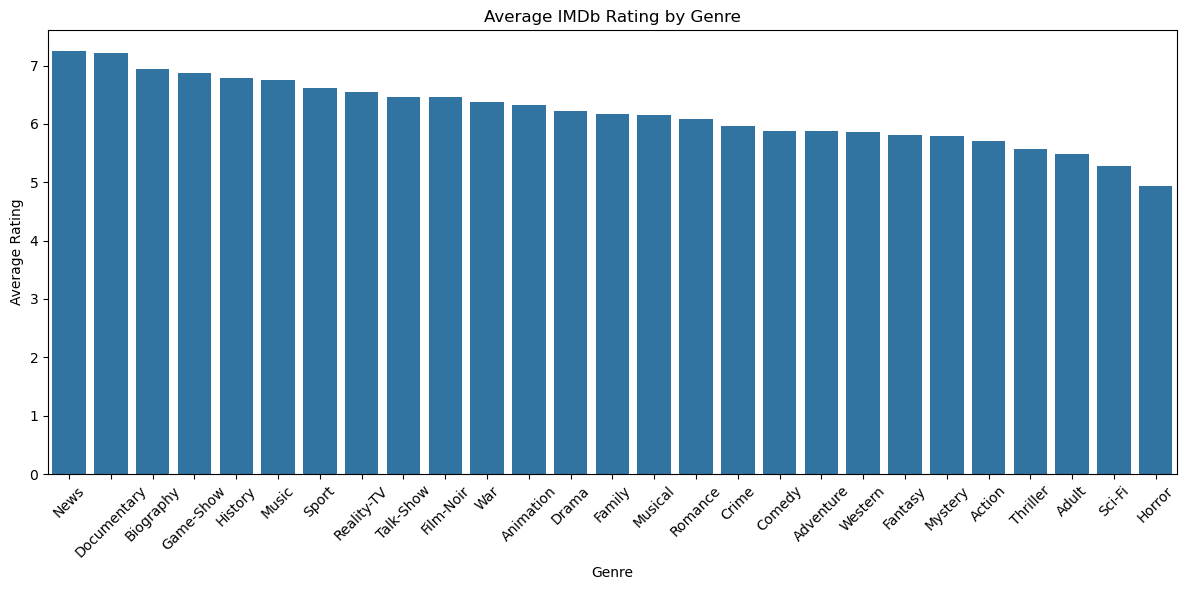

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values)
plt.xticks(rotation=45)
plt.title("Average IMDb Rating by Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

<h5>Year-wise Rating Trend</h5>

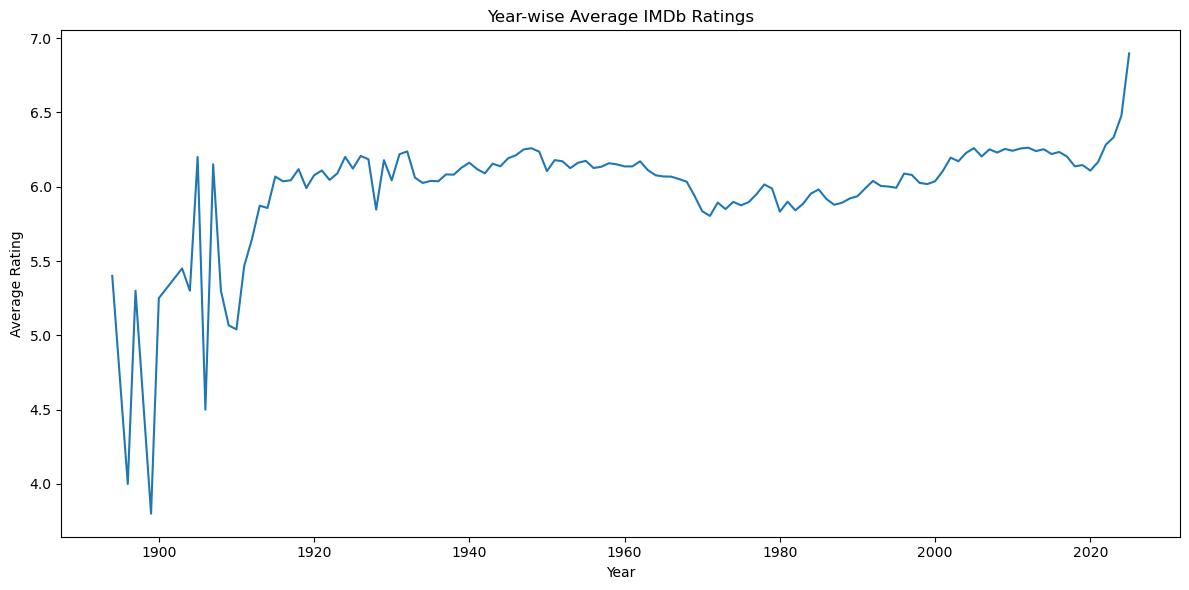

In [47]:
plt.figure(figsize=(12,6))
sns.lineplot(x='startYear', y='averageRating', data=yearly_rating)
plt.title("Year-wise Average IMDb Ratings")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

<h5>Top 10 Movies</h5>

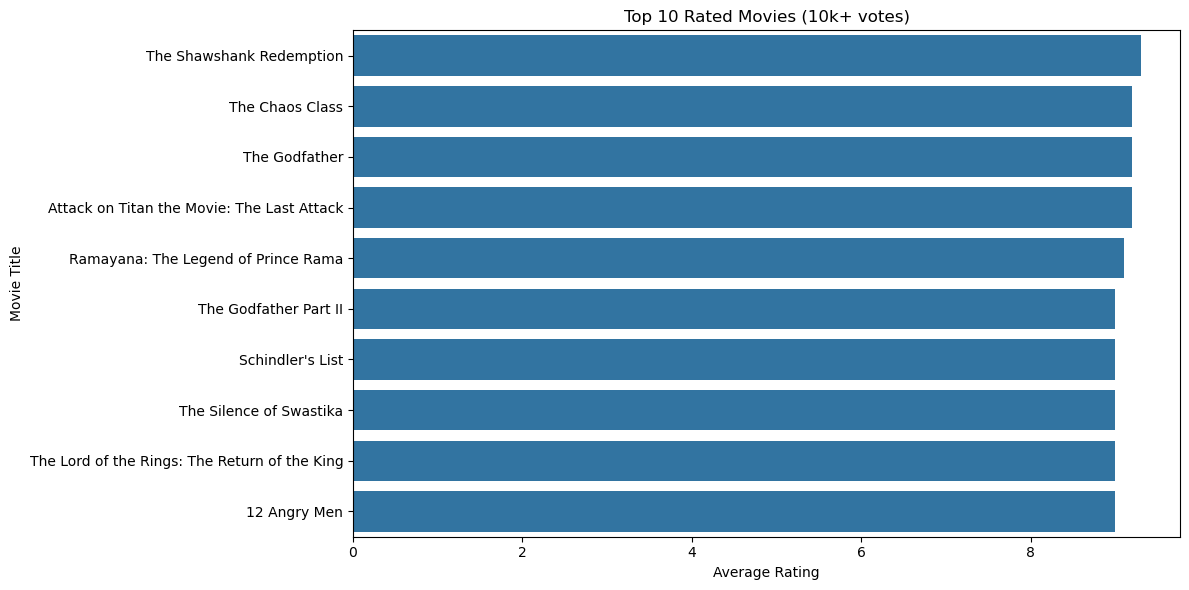

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(y=top_rated['primaryTitle'], x=top_rated['averageRating'])
plt.title("Top 10 Rated Movies (10k+ votes)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

In [54]:
# Final merged data
merged.to_csv("imdb_cleaned_movies.csv", index=False)

# Genre exploded data
genre_split.to_csv("imdb_genre_split.csv", index=False)